In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpt as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

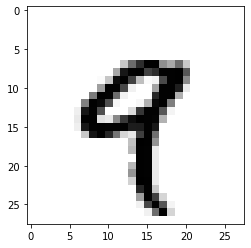

In [5]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)


In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model=tf.keras.models.Sequential() #a feed forward model
model.add(tf.keras.layers.Flatten()) #takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #a simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [10]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize the loss
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2670 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0556 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0218 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [11]:
val_loss,val_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9715


In [12]:
val_loss

0.12601467967033386

In [13]:
val_acc

0.9714999794960022

In [14]:
model.save('Digit_model.h5')    


In [18]:
new_model=tf.keras.models.load_model('Digit_model.h5')
predictions=new_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
new_model

In [21]:
predictions[0]

array([2.1896076e-14, 1.2419143e-11, 1.7616686e-11, 1.0790279e-09,
       4.5177745e-13, 2.3611549e-13, 9.0209700e-20, 1.0000000e+00,
       1.6882905e-14, 7.6757173e-10], dtype=float32)

In [22]:
import numpy as np

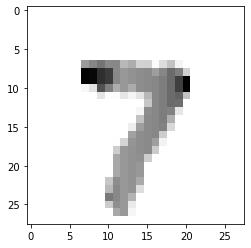

In [23]:
plt.imshow(x_test[86],cmap=plt.cm.binary)
plt.show()

In [24]:
np.argmax(predictions[86])

7

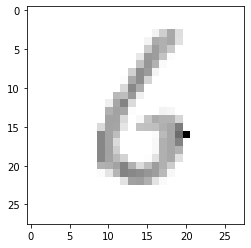

In [25]:
plt.imshow(x_test[50],cmap=plt.cm.binary)
plt.show()

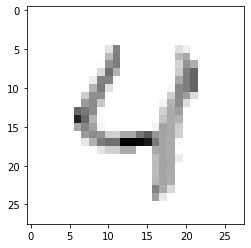

In [26]:
plt.imshow(x_test[4],cmap=plt.cm.binary)
plt.show()

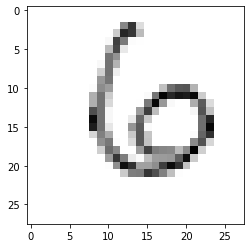

In [27]:
plt.imshow(x_test[100],cmap=plt.cm.binary)
plt.show()

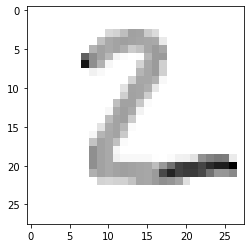

In [28]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()